In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
import pandas as pd

class PointCloudFitter:
    def __init__(self, x, y):
        """
        Initialize with point cloud data.
        
        Args:
            x (array-like): x coordinates
            y (array-like): y coordinates
        """
        self.x = np.array(x)
        self.y = np.array(y)
        self.x_fit = np.linspace(min(x), max(x), 1000)
        
    def linear_fit(self):
        """Fit a linear trendline (y = mx + b)"""
        coeffs = np.polyfit(self.x, self.y, 1)
        y_fit = np.poly1d(coeffs)(self.x_fit)
        r2 = self._calculate_r2(np.poly1d(coeffs)(self.x))
        return {
            'x_fit': self.x_fit,
            'y_fit': y_fit,
            'equation': f'y = {coeffs[0]:.4f}x + {coeffs[1]:.4f}',
            'r2': r2
        }
    
    def polynomial_fit(self, degree=2):
        """
        Fit a polynomial trendline.
        
        Args:
            degree (int): Degree of polynomial
        """
        coeffs = np.polyfit(self.x, self.y, degree)
        y_fit = np.poly1d(coeffs)(self.x_fit)
        r2 = self._calculate_r2(np.poly1d(coeffs)(self.x))
        
        # Create equation string
        equation = 'y = '
        for i, coeff in enumerate(coeffs):
            power = degree - i
            if power > 1:
                equation += f'{coeff:.4f}x^{power} + '
            elif power == 1:
                equation += f'{coeff:.4f}x + '
            else:
                equation += f'{coeff:.4f}'
                
        return {
            'x_fit': self.x_fit,
            'y_fit': y_fit,
            'equation': equation,
            'r2': r2
        }
    
    def exponential_fit(self):
        """Fit an exponential trendline (y = ae^(bx))"""
        def exp_func(x, a, b):
            return a * np.exp(b * x)
        
        # Fit exponential function
        popt, _ = curve_fit(exp_func, self.x, self.y, p0=[1, 0.1])
        y_fit = exp_func(self.x_fit, *popt)
        r2 = self._calculate_r2(exp_func(self.x, *popt))
        
        return {
            'x_fit': self.x_fit,
            'y_fit': y_fit,
            'equation': f'y = {popt[0]:.4f}e^({popt[1]:.4f}x)',
            'r2': r2
        }
    
    def logarithmic_fit(self):
        """Fit a logarithmic trendline (y = a*ln(x) + b)"""
        # Handle negative or zero x values
        if min(self.x) <= 0:
            raise ValueError("Logarithmic fit requires positive x values")
            
        coeffs = np.polyfit(np.log(self.x), self.y, 1)
        y_fit = coeffs[0] * np.log(self.x_fit) + coeffs[1]
        r2 = self._calculate_r2(coeffs[0] * np.log(self.x) + coeffs[1])
        
        return {
            'x_fit': self.x_fit,
            'y_fit': y_fit,
            'equation': f'y = {coeffs[0]:.4f}ln(x) + {coeffs[1]:.4f}',
            'r2': r2
        }
    
    def power_fit(self):
        """Fit a power trendline (y = ax^b)"""
        # Handle negative or zero values
        if min(self.x) <= 0 or min(self.y) <= 0:
            raise ValueError("Power fit requires positive x and y values")
            
        coeffs = np.polyfit(np.log(self.x), np.log(self.y), 1)
        # Convert back from log space
        a = np.exp(coeffs[1])
        b = coeffs[0]
        
        y_fit = a * self.x_fit**b
        r2 = self._calculate_r2(a * self.x**b)
        
        return {
            'x_fit': self.x_fit,
            'y_fit': y_fit,
            'equation': f'y = {a:.4f}x^{b:.4f}',
            'r2': r2
        }
    
    def _calculate_r2(self, y_pred):
        """Calculate R-squared value"""
        residuals = self.y - y_pred
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((self.y - np.mean(self.y))**2)
        return 1 - (ss_res / ss_tot)
    
    def plot_all_fits(self):
        """Plot original data with all possible trendlines"""
        plt.figure(figsize=(12, 8))
        
        # Plot original points
        plt.scatter(self.x, self.y, color='black', alpha=0.5, label='Data Points')
        
        # Try all fits
        fits = {
            'Linear': self.linear_fit,
            'Polynomial (2nd degree)': lambda: self.polynomial_fit(2),
            'Polynomial (3rd degree)': lambda: self.polynomial_fit(3),
            'Exponential': self.exponential_fit
        }
        
        # Add logarithmic and power fits if data allows
        if min(self.x) > 0:
            fits['Logarithmic'] = self.logarithmic_fit
            if min(self.y) > 0:
                fits['Power'] = self.power_fit
        
        # Plot each fit
        for name, fit_func in fits.items():
            try:
                result = fit_func()
                plt.plot(result['x_fit'], result['y_fit'], 
                        label=f'{name}: {result["equation"]}\nR² = {result["r2"]:.4f}')
            except:
                print(f"Could not compute {name} fit")
        
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Point Cloud Data with Trendlines')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.loglog()
        plt.tight_layout()
        plt.show()

# Example usage
if __name__ == "__main__":
    # Generate sample data
    data = pd.read_csv('all_data_results.csv')
    """subset_data=data.map(["Support"]="Fixed_Fixed")
    x=data["frequency"]
    y=data["allowable_deformation"]
    
    
    # Create fitter object
    fitter = PointCloudFitter(x, y)
    
    # Plot all fits
    fitter.plot_all_fits()
    
    # Get specific fit results
    linear_fit = fitter.linear_fit()
    print("\nLinear Fit Results:")
    print(f"Equation: {linear_fit['equation']}")
    print(f"R-squared: {linear_fit['r2']:.4f}")"""

In [56]:
plot_frequency = data['frequency']

plot_displacement_0P_mm = data['allowable_deformation']
plot_displacement_PP_mm = plot_displacement_0P_mm*2
plot_displacement_RMS_mm = plot_displacement_0P_mm/(2**0.5)
plot_displacement_PP_mils = plot_displacement_PP_mm/0.0254
plot_displacement_RMS_mils = plot_displacement_RMS_mm/0.0254
plot_displacement_0P_mils = plot_displacement_0P_mm/0.0254

plot_velocity_0P_mm = data['allowable_deformation']*2*np.pi*data['frequency']
plot_velocity_PP_mm = plot_velocity_0P_mm*2
plot_velocity_RMS_mm = plot_velocity_0P_mm/(2**0.5)
plot_velocity_PP_mils = plot_velocity_PP_mm/0.0254
plot_velocity_RMS_mils = plot_velocity_RMS_mm/0.0254
plot_velocity_0P_mils = plot_velocity_0P_mm/0.0254

plot_linspace = np.linspace(0,1000,10000)

plot_SWRI_DESIGN_displacement_PP_mils = (250/plot_linspace)**0.5
plot_SWRI_MARGINAL_displacement_PP_mils = plot_SWRI_DESIGN_displacement_PP_mils*2
plot_SWRI_CORRECTION_displacement_PP_mils = plot_SWRI_DESIGN_displacement_PP_mils*4
plot_SWRI_DANGER_displacement_PP_mils = plot_SWRI_DESIGN_displacement_PP_mils*10
plot_SWRI_PERCEPTION_displacement_PP_mils = plot_SWRI_DESIGN_displacement_PP_mils*0.25


plot_SWRI_DESIGN_velocity_RMS_mm = plot_SWRI_DESIGN_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace
plot_SWRI_MARGINAL_velocity_RMS_mm = plot_SWRI_MARGINAL_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace
plot_SWRI_CORRECTION_velocity_RMS_mm = plot_SWRI_CORRECTION_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace
plot_SWRI_DANGER_velocity_RMS_mm = plot_SWRI_DANGER_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace

plot_EI_CONCERN_velocity_RMS_mm = 10**((np.log10(plot_linspace)+0.48017)/(2.127612))
plot_EI_PROBLEM_velocity_RMS_mm = 10**((np.log10(plot_linspace)+1.871083)/(2.084547))

plot_EI_CONCERN_displacement_PP_mils = plot_EI_CONCERN_velocity_RMS_mm/0.0254*(2*2**0.5)/(2*np.pi*plot_linspace)
plot_EI_PROBLEM_displacement_PP_mils = plot_EI_PROBLEM_velocity_RMS_mm/0.0254*(2*2**0.5)/(2*np.pi*plot_linspace)


C:\Users\austi\AppData\Local\Temp\ipykernel_21592\2062395394.py:19: RuntimeWarning: divide by zero encountered in divide
  plot_SWRI_DESIGN_displacement_PP_mils = (250/plot_linspace)**0.5
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\2062395394.py:26: RuntimeWarning: invalid value encountered in multiply
  plot_SWRI_DESIGN_velocity_RMS_mm = plot_SWRI_DESIGN_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\2062395394.py:27: RuntimeWarning: invalid value encountered in multiply
  plot_SWRI_MARGINAL_velocity_RMS_mm = plot_SWRI_MARGINAL_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\2062395394.py:28: RuntimeWarning: invalid value encountered in multiply
  plot_SWRI_CORRECTION_velocity_RMS_mm = plot_SWRI_CORRECTION_displacement_PP_mils*0.0254/(2*2**0.5)*2*np.pi*plot_linspace
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\2062395394.py:29: RuntimeWarning: inval

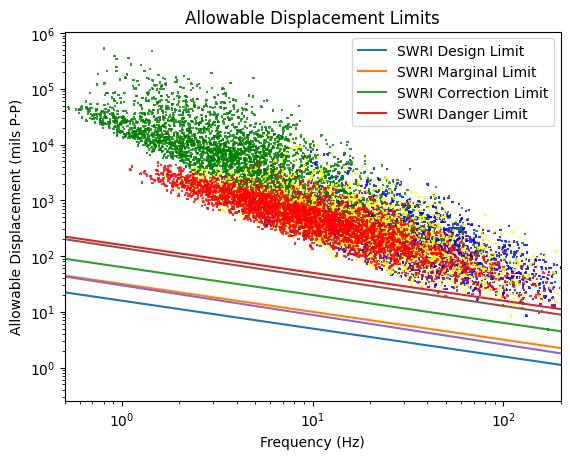

In [57]:
#ANSYS results plot of frequency and displacement PP mils
plt.scatter(plot_frequency,plot_displacement_PP_mils, s=3,alpha=0.8,marker='+',c=data['support'].map({'Fixed_Fixed': 'blue', 'Fixed_Free': 'green', 'Pinned_Pinned': 'red','Pinned_Fixed':'yellow','Free_Fixed':'black'}))
plt.title('Allowable Displacement Limits')
plt.xlim([0.5,200])
plt.loglog()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Allowable Displacement (mils P-P)')


plt.plot(plot_linspace,plot_SWRI_DESIGN_displacement_PP_mils, label='SWRI Design Limit')
plt.plot(plot_linspace,plot_SWRI_MARGINAL_displacement_PP_mils, label='SWRI Marginal Limit')
plt.plot(plot_linspace,plot_SWRI_CORRECTION_displacement_PP_mils, label='SWRI Correction Limit')
plt.plot(plot_linspace,plot_SWRI_DANGER_displacement_PP_mils, label='SWRI Danger Limit')


plt.plot(plot_linspace,plot_EI_CONCERN_displacement_PP_mils)
plt.plot(plot_linspace,plot_EI_PROBLEM_displacement_PP_mils)

#plt.plot(plot_linspace,plot_SWRI_PERCEPTION_displacement_PP_mils)

plt.legend()

plt.show()

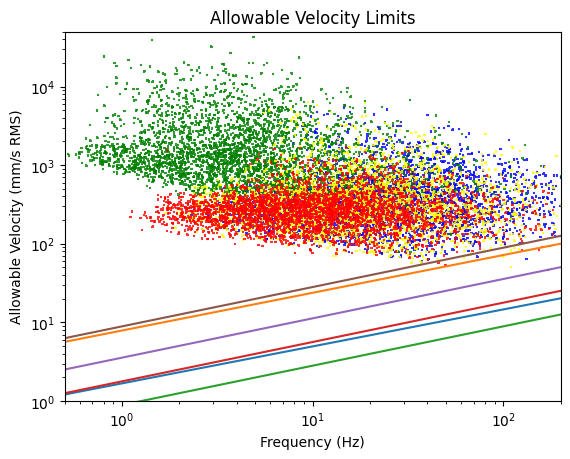

In [58]:
#ANSYS results plot of frequency and velcity RMS mm/s
plt.scatter(plot_frequency,plot_velocity_RMS_mm, s=3,alpha=0.8,marker='+',c=data['support'].map({'Fixed_Fixed': 'blue', 'Fixed_Free': 'green', 'Pinned_Pinned': 'red','Pinned_Fixed':'yellow','Free_Fixed':'black'}))
plt.title('Allowable Velocity Limits')
plt.ylim([1,50000])
plt.xlim([0.5,200])
plt.loglog()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Allowable Velocity (mm/s RMS)')

plt.plot(plot_linspace,plot_EI_CONCERN_velocity_RMS_mm)
plt.plot(plot_linspace,plot_EI_PROBLEM_velocity_RMS_mm)

plt.plot(plot_linspace,plot_SWRI_DESIGN_velocity_RMS_mm)
plt.plot(plot_linspace,plot_SWRI_MARGINAL_velocity_RMS_mm)
plt.plot(plot_linspace,plot_SWRI_CORRECTION_velocity_RMS_mm)
plt.plot(plot_linspace,plot_SWRI_DANGER_velocity_RMS_mm)

#plt.plot([0.5,200],[8.9,8.9])


plt.show()

In [59]:
series1 = plot_frequency
series2 = plot_displacement_PP_mils
series3 = data['support'].map({'Fixed_Fixed': 'Fixed Fixed', 'Fixed_Free': 'Fixed Free', 'Pinned_Pinned': 'Pinned Pinned','Pinned_Fixed':'Pinned Fixed'})
temp_df = pd.concat([series1, series2, series3], axis=1)

plot_fixed_fixed_displacement_PP_mils = temp_df[temp_df['support'].eq('Fixed Fixed')]
plot_fixed_free_displacement_PP_mils = temp_df[temp_df['support'].eq('Fixed Free')]
plot_pinned_pinned_displacement_PP_mils = temp_df[temp_df['support'].eq('Pinned Pinned')]
plot_pinned_fixed_displacement_PP_mils = temp_df[temp_df['support'].eq('Pinned Fixed')]

In [60]:
series1 = plot_frequency
series2 = plot_velocity_RMS_mm
series3 = data['support'].map({'Fixed_Fixed': 'Fixed Fixed', 'Fixed_Free': 'Fixed Free', 'Pinned_Pinned': 'Pinned Pinned','Pinned_Fixed':'Pinned Fixed'})
temp_df = pd.concat([series1, series2, series3], axis=1)

plot_fixed_fixed_velocity_RMS_mm = temp_df[temp_df['support'].eq('Fixed Fixed')]
plot_fixed_free_velocity_RMS_mm = temp_df[temp_df['support'].eq('Fixed Free')]
plot_pinned_pinned_velocity_RMS_mm = temp_df[temp_df['support'].eq('Pinned Pinned')]
plot_pinned_fixed_velocity_RMS_mm = temp_df[temp_df['support'].eq('Pinned Fixed')]

In [61]:
from inline_labels import add_inline_labels

In [62]:
#PP
u=1.25/(2*np.pi*200)*1000

x_API618_mils=[0,10,200]
y_API618_mils=[20,20,u]

#RMS
x_ASME=[0,200]
y_ASME=[8.9,8.9]

B1=0.202*(2*np.pi)*2
C1=0.302*(2*np.pi)*2
D1=0.454*(2*np.pi)*2

B2=0.202*(2*np.pi)*10
C2=0.302*(2*np.pi)*10
D2=0.454*(2*np.pi)*10

B3=12.7
C3=19
D3=28.5

x_ISO_B=[2,10,200]
y_ISO_B=[B1,B2,B3]

x_ISO_C=[2,10,200]
y_ISO_C=[C1,C2,C3]

x_ISO_D=[2,10,200]
y_ISO_D=[D1,D2,D3]

In [63]:
#PP
x_ASME_dis=[0.1,200]
y_ASME_dis=[8.9/(2*np.pi*0.1)/0.0254*(2*2**0.5),8.9/(2*np.pi*200)/0.0254*(2*2**0.5)]

y_ISO_B_dis=[b/(a*2*np.pi)/0.0254*(2*2**0.5) for a, b in zip(x_ISO_B, y_ISO_B)]
y_ISO_C_dis=[b/(a*2*np.pi)/0.0254*(2*2**0.5) for a, b in zip(x_ISO_C, y_ISO_C)]
y_ISO_D_dis=[b/(a*2*np.pi)/0.0254*(2*2**0.5) for a, b in zip(x_ISO_D, y_ISO_D)]

#RMS
x_API618_vel=[0,10,200]
y_API618_vel=[0,11.31,11.31]

Labels placement: 100%|#########################| 56/56 [00:01<00:00, 39.81it/s]
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\1392794833.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


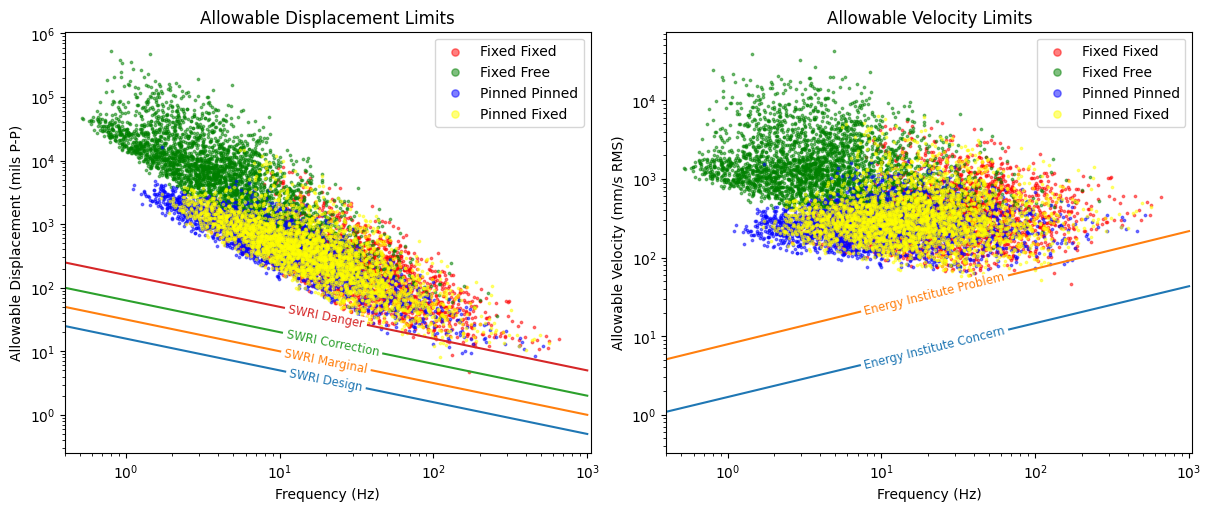

In [64]:
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 5))
axes = axes.flatten()

axes[0].scatter(plot_fixed_fixed_displacement_PP_mils["frequency"],plot_fixed_fixed_displacement_PP_mils["allowable_deformation"],label="Fixed Fixed",c='r',s=3,alpha=0.5)
axes[0].scatter(plot_fixed_free_displacement_PP_mils["frequency"],plot_fixed_free_displacement_PP_mils["allowable_deformation"],label="Fixed Free",c='g',s=3,alpha=0.5)
axes[0].scatter(plot_pinned_pinned_displacement_PP_mils["frequency"],plot_pinned_pinned_displacement_PP_mils["allowable_deformation"],label="Pinned Pinned",c='b',s=3,alpha=0.5)
axes[0].scatter(plot_pinned_fixed_displacement_PP_mils["frequency"],plot_pinned_fixed_displacement_PP_mils["allowable_deformation"],label="Pinned Fixed",c='yellow',s=3,alpha=0.5)

axes[0].plot(plot_linspace,plot_SWRI_DESIGN_displacement_PP_mils, label='SWRI Design')
axes[0].plot(plot_linspace,plot_SWRI_MARGINAL_displacement_PP_mils, label='SWRI Marginal')
axes[0].plot(plot_linspace,plot_SWRI_CORRECTION_displacement_PP_mils, label='SWRI Correction')
axes[0].plot(plot_linspace,plot_SWRI_DANGER_displacement_PP_mils, label='SWRI Danger')

#axes[0].plot(x_ASME_dis,y_ASME_dis)

axes[0].set_title('Allowable Displacement Limits')
axes[0].set_xlim(left=0.4)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Allowable Displacement (mils P-P)')

axes[0].loglog()

add_inline_labels(axes[0], with_overall_progress=True, fontsize="small",debug=False)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(labels[0:4],markerscale=3)

axes[1].scatter(plot_fixed_fixed_velocity_RMS_mm["frequency"],plot_fixed_fixed_velocity_RMS_mm[0],label="Fixed Fixed",c='r',s=3,alpha=0.5)
axes[1].scatter(plot_fixed_free_velocity_RMS_mm["frequency"],plot_fixed_free_velocity_RMS_mm[0],label="Fixed Free",c='g',s=3,alpha=0.5)
axes[1].scatter(plot_pinned_pinned_velocity_RMS_mm["frequency"],plot_pinned_pinned_velocity_RMS_mm[0],label="Pinned Pinned",c='b',s=3,alpha=0.5)
axes[1].scatter(plot_pinned_fixed_velocity_RMS_mm["frequency"],plot_pinned_fixed_velocity_RMS_mm[0],label="Pinned Fixed",c='yellow',s=3,alpha=0.5)

axes[1].plot(plot_linspace,plot_EI_CONCERN_velocity_RMS_mm, label='Energy Institute Concern')
axes[1].plot(plot_linspace,plot_EI_PROBLEM_velocity_RMS_mm, label='Energy Institute Problem')

#axes[1].plot(x_ASME,y_ASME)

axes[1].set_title('Allowable Velocity Limits')
axes[1].set_xlim(left=0.4)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Allowable Velocity (mm/s RMS)')

axes[1].loglog()

add_inline_labels(axes[1], with_overall_progress=True, fontsize="small",debug=False)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(labels[0:4],markerscale=3)

fig.show()

[]

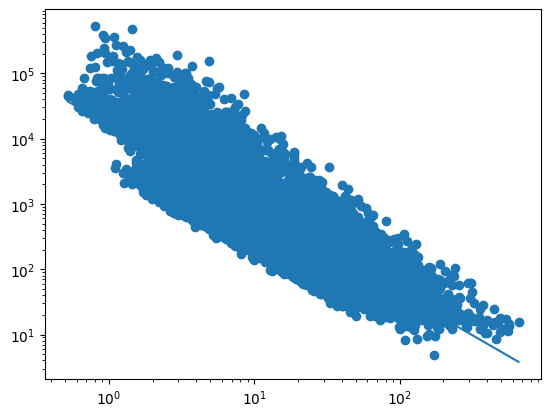

In [85]:
x=plot_frequency
y=plot_displacement_PP_mils

plt.scatter(x,y)
# Create fitter object
fitter = PointCloudFitter(x, y)

# Plot all fits
a=fitter.power_fit()
x=a['x_fit']
y=a['y_fit']
plt.plot(x,y)
plt.loglog()

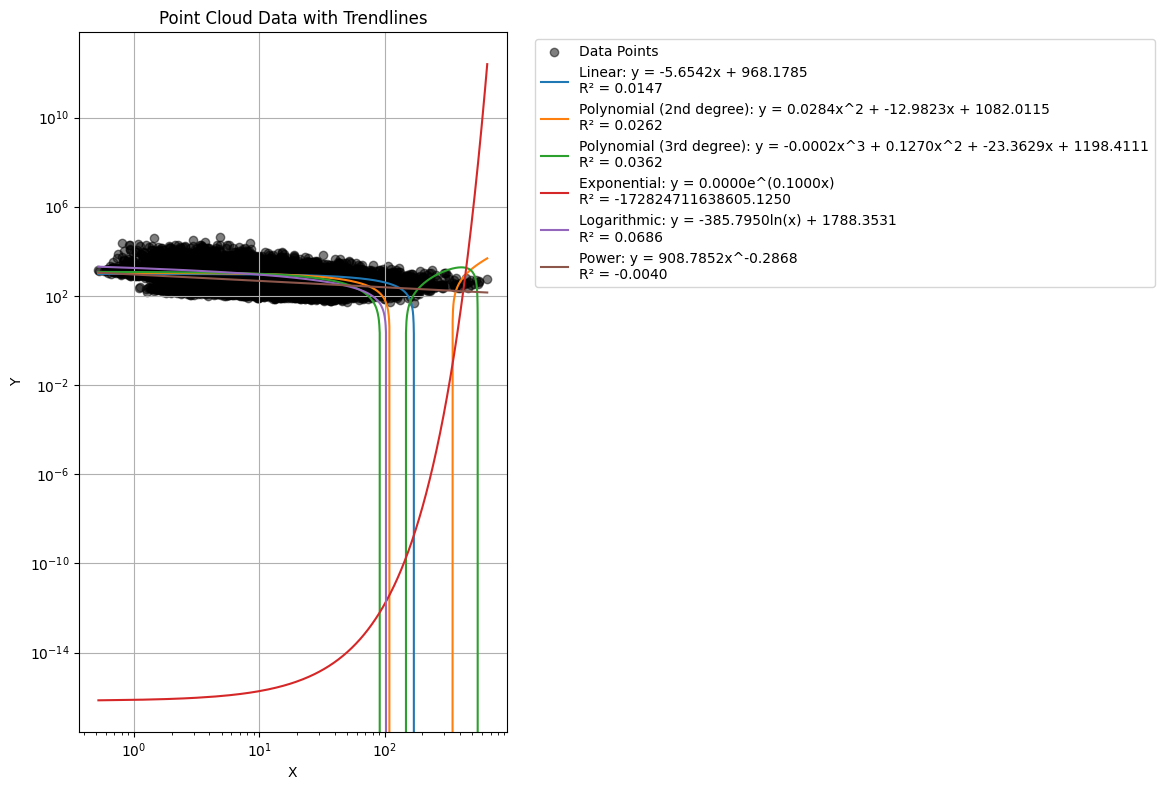

In [66]:
x=plot_frequency
y=plot_velocity_RMS_mm


# Create fitter object
fitter = PointCloudFitter(x, y)

# Plot all fits
fitter.plot_all_fits()

C:\Users\austi\AppData\Local\Temp\ipykernel_21592\3358021405.py:3: RuntimeWarning: divide by zero encountered in power
  trendline=16106*plot_linspace**-1.287
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\3358021405.py:17: RuntimeWarning: divide by zero encountered in divide
  axes.plot(plot_linspace,1417.82/plot_linspace)
Labels placement: 100%|#######################| 257/257 [00:06<00:00, 42.48it/s]


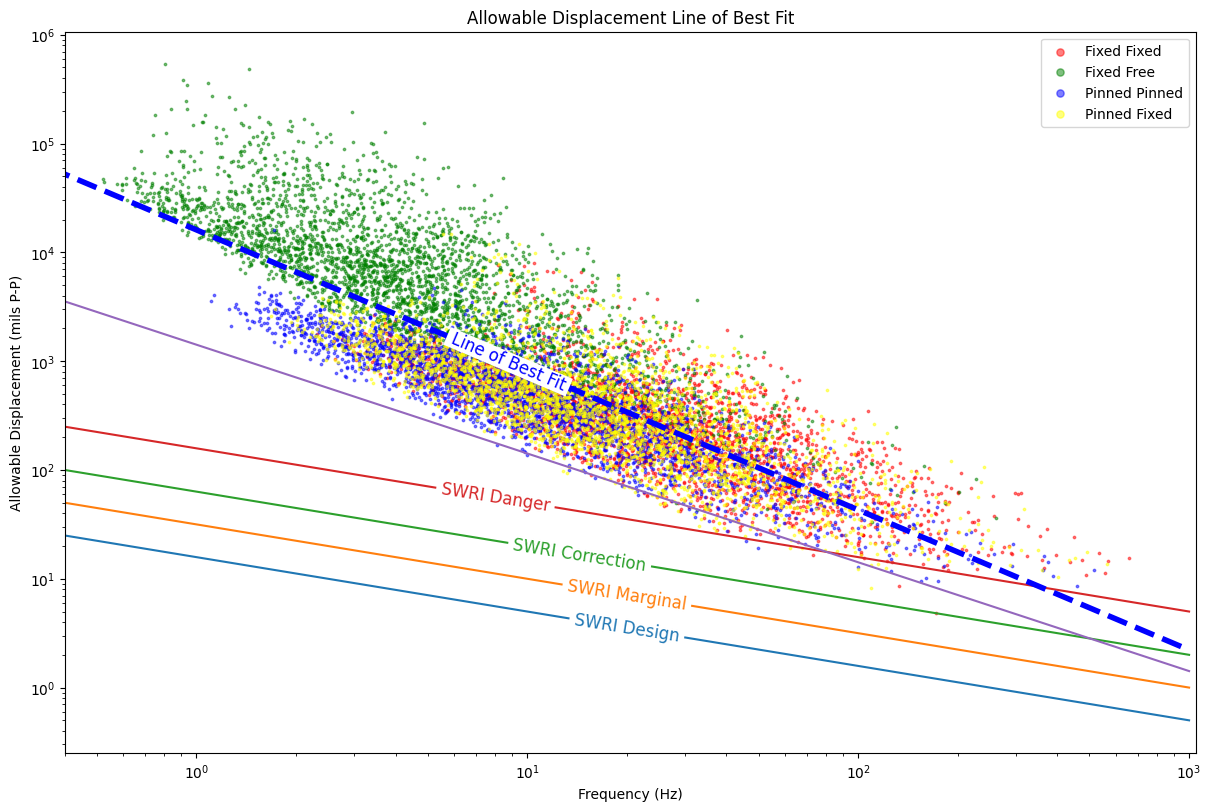

In [103]:
fig, axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(12, 8))

trendline=16106*plot_linspace**-1.287


axes.scatter(plot_fixed_fixed_displacement_PP_mils["frequency"],plot_fixed_fixed_displacement_PP_mils["allowable_deformation"],label="Fixed Fixed",c='r',s=3,alpha=0.5)
axes.scatter(plot_fixed_free_displacement_PP_mils["frequency"],plot_fixed_free_displacement_PP_mils["allowable_deformation"],label="Fixed Free",c='g',s=3,alpha=0.5)
axes.scatter(plot_pinned_pinned_displacement_PP_mils["frequency"],plot_pinned_pinned_displacement_PP_mils["allowable_deformation"],label="Pinned Pinned",c='b',s=3,alpha=0.5)
axes.scatter(plot_pinned_fixed_displacement_PP_mils["frequency"],plot_pinned_fixed_displacement_PP_mils["allowable_deformation"],label="Pinned Fixed",c='yellow',s=3,alpha=0.5)

axes.plot(plot_linspace,plot_SWRI_DESIGN_displacement_PP_mils, label='SWRI Design')
axes.plot(plot_linspace,plot_SWRI_MARGINAL_displacement_PP_mils, label='SWRI Marginal')
axes.plot(plot_linspace,plot_SWRI_CORRECTION_displacement_PP_mils, label='SWRI Correction')
axes.plot(plot_linspace,plot_SWRI_DANGER_displacement_PP_mils, label='SWRI Danger')

axes.plot(plot_linspace,trendline,"b--",linewidth=4, label='Line of Best Fit')
axes.plot(plot_linspace,1417.82/plot_linspace)


axes.set_title('Allowable Displacement Line of Best Fit')
axes.set_xlim(left=0.4)
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Allowable Displacement (mils P-P)')

axes.loglog()

add_inline_labels(axes, with_overall_progress=True, fontsize="large",debug=False)
handles, labels = axes.get_legend_handles_labels()
axes.legend(labels[0:4],markerscale=3)

Labels placement: 100%|#######################| 121/121 [00:01<00:00, 71.82it/s]


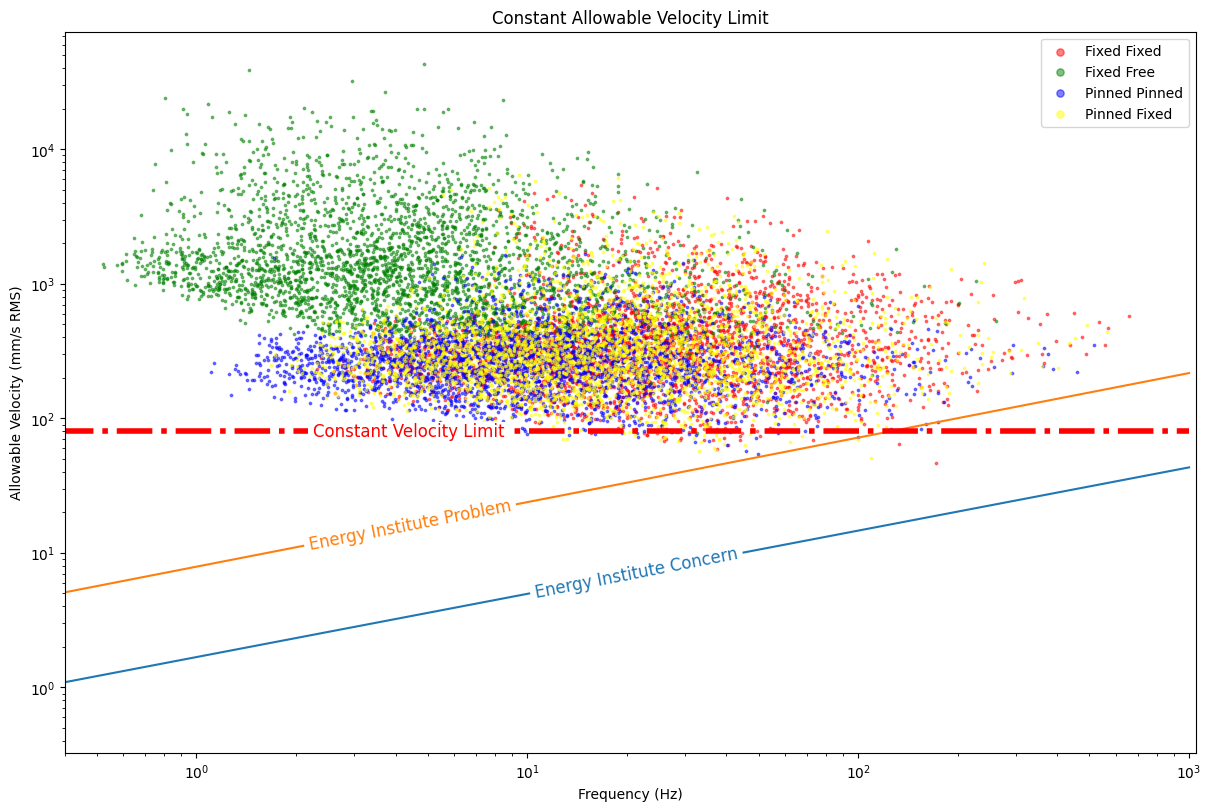

In [120]:
fig, axes = plt.subplots(ncols=1, nrows=1, constrained_layout=True, figsize=(12, 8))

axes.scatter(plot_fixed_fixed_velocity_RMS_mm["frequency"],plot_fixed_fixed_velocity_RMS_mm[0],label="Fixed Fixed",c='r',s=3,alpha=0.5)
axes.scatter(plot_fixed_free_velocity_RMS_mm["frequency"],plot_fixed_free_velocity_RMS_mm[0],label="Fixed Free",c='g',s=3,alpha=0.5)
axes.scatter(plot_pinned_pinned_velocity_RMS_mm["frequency"],plot_pinned_pinned_velocity_RMS_mm[0],label="Pinned Pinned",c='b',s=3,alpha=0.5)
axes.scatter(plot_pinned_fixed_velocity_RMS_mm["frequency"],plot_pinned_fixed_velocity_RMS_mm[0],label="Pinned Fixed",c='yellow',s=3,alpha=0.5)

axes.plot(plot_linspace,plot_EI_CONCERN_velocity_RMS_mm, label='Energy Institute Concern')
axes.plot(plot_linspace,plot_EI_PROBLEM_velocity_RMS_mm, label='Energy Institute Problem')

axes.plot([plot_linspace[0],plot_linspace[-1]],[80,80],"r-." ,linewidth=4,label="Constant Velocity Limit")
#axes.plot(plot_linspace,(908.769**(1/0.287)/plot_linspace)**0.287)

axes.set_title('Constant Allowable Velocity Limit')
axes.set_xlim(left=0.4)
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Allowable Velocity (mm/s RMS)')

axes.loglog()

add_inline_labels(axes, with_overall_progress=True, fontsize="large",debug=False)
handles, labels = axes.get_legend_handles_labels()
axes.legend(labels[0:4],markerscale=3)

C:\Users\austi\AppData\Local\Temp\ipykernel_21592\3415908047.py:15: RuntimeWarning: divide by zero encountered in divide
  axes[0].plot(plot_linspace,1417.82/plot_linspace,'r-.' ,linewidth=4,label="Transformed Constant Velocity Limit")
Labels placement: 100%|#######################| 160/160 [00:03<00:00, 44.91it/s]
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\3415908047.py:36: RuntimeWarning: divide by zero encountered in divide
  trans=(908.769**(1/0.287)/plot_linspace)**0.287
Labels placement: 100%|#########################| 62/62 [00:00<00:00, 81.92it/s]
C:\Users\austi\AppData\Local\Temp\ipykernel_21592\3415908047.py:52: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


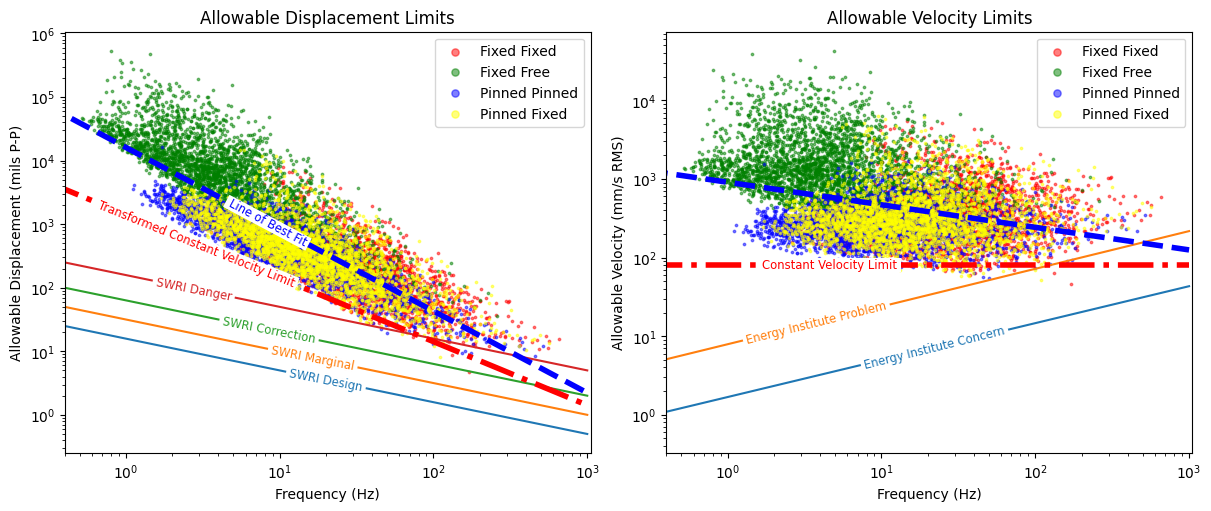

In [118]:
fig, axes = plt.subplots(ncols=2, nrows=1, constrained_layout=True, figsize=(12, 5))
axes = axes.flatten()

axes[0].scatter(plot_fixed_fixed_displacement_PP_mils["frequency"],plot_fixed_fixed_displacement_PP_mils["allowable_deformation"],label="Fixed Fixed",c='r',s=3,alpha=0.5)
axes[0].scatter(plot_fixed_free_displacement_PP_mils["frequency"],plot_fixed_free_displacement_PP_mils["allowable_deformation"],label="Fixed Free",c='g',s=3,alpha=0.5)
axes[0].scatter(plot_pinned_pinned_displacement_PP_mils["frequency"],plot_pinned_pinned_displacement_PP_mils["allowable_deformation"],label="Pinned Pinned",c='b',s=3,alpha=0.5)
axes[0].scatter(plot_pinned_fixed_displacement_PP_mils["frequency"],plot_pinned_fixed_displacement_PP_mils["allowable_deformation"],label="Pinned Fixed",c='yellow',s=3,alpha=0.5)

axes[0].plot(plot_linspace,plot_SWRI_DESIGN_displacement_PP_mils, label='SWRI Design')
axes[0].plot(plot_linspace,plot_SWRI_MARGINAL_displacement_PP_mils, label='SWRI Marginal')
axes[0].plot(plot_linspace,plot_SWRI_CORRECTION_displacement_PP_mils, label='SWRI Correction')
axes[0].plot(plot_linspace,plot_SWRI_DANGER_displacement_PP_mils, label='SWRI Danger')

axes[0].plot(plot_linspace,trendline,"b--", linewidth=4,label='Line of Best Fit')
axes[0].plot(plot_linspace,1417.82/plot_linspace,'r-.' ,linewidth=4,label="Transformed Constant Velocity Limit")

axes[0].set_title('Allowable Displacement Limits')
axes[0].set_xlim(left=0.4)
axes[0].set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Allowable Displacement (mils P-P)')

axes[0].loglog()

add_inline_labels(axes[0], with_overall_progress=True, fontsize="small",debug=False)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(labels[0:4],markerscale=3)

axes[1].scatter(plot_fixed_fixed_velocity_RMS_mm["frequency"],plot_fixed_fixed_velocity_RMS_mm[0],label="Fixed Fixed",c='r',s=3,alpha=0.5)
axes[1].scatter(plot_fixed_free_velocity_RMS_mm["frequency"],plot_fixed_free_velocity_RMS_mm[0],label="Fixed Free",c='g',s=3,alpha=0.5)
axes[1].scatter(plot_pinned_pinned_velocity_RMS_mm["frequency"],plot_pinned_pinned_velocity_RMS_mm[0],label="Pinned Pinned",c='b',s=3,alpha=0.5)
axes[1].scatter(plot_pinned_fixed_velocity_RMS_mm["frequency"],plot_pinned_fixed_velocity_RMS_mm[0],label="Pinned Fixed",c='yellow',s=3,alpha=0.5)

axes[1].plot(plot_linspace,plot_EI_CONCERN_velocity_RMS_mm, label='Energy Institute Concern')
axes[1].plot(plot_linspace,plot_EI_PROBLEM_velocity_RMS_mm, label='Energy Institute Problem')

trans=(908.769**(1/0.287)/plot_linspace)**0.287

axes[1].plot(plot_linspace,trans,'b--',linewidth=4,label="Transformed Line of Best Fit")
axes[1].plot([plot_linspace[0],plot_linspace[-1]],[80,80],'r-.',linewidth=4,label="Constant Velocity Limit")

axes[1].set_title('Allowable Velocity Limits')
axes[1].set_xlim(left=0.4)
axes[1].set_xlabel('Frequency (Hz)')
axes[1].set_ylabel('Allowable Velocity (mm/s RMS)')

axes[1].loglog()

add_inline_labels(axes[1], with_overall_progress=True, fontsize="small",debug=False)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(labels[0:4],markerscale=3)

fig.show()